In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
data_dir = 'C:/Users/mk344/OneDrive - Drexel University/Drexel courses/Fall Quarter 2019-2020/ECEC 487/microbiome_glove_embedding/data'
fig_dir = 'C:/Users/mk344/OneDrive - Drexel University/Drexel courses/Fall Quarter 2019-2020/ECEC 487/microbiome_glove_embedding/figures'

In [3]:
f = open(os.path.join(data_dir, "X_sample_property.obj"), "rb")
X = pickle.load(f)
f.close()
# print(X)
X = np.array(X)

In [4]:
f = open(os.path.join(data_dir, "y_sample_ibd.obj"), "rb")
y = pickle.load(f)
f.close()
y = list(y[0].values)

In [5]:
# print(X)
feat_cols = [str(i) for i in range(X.shape[1])]
# print(feat_cols)
df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
# print(df)

In [6]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [7]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.39582951 0.1403168  0.08413092]


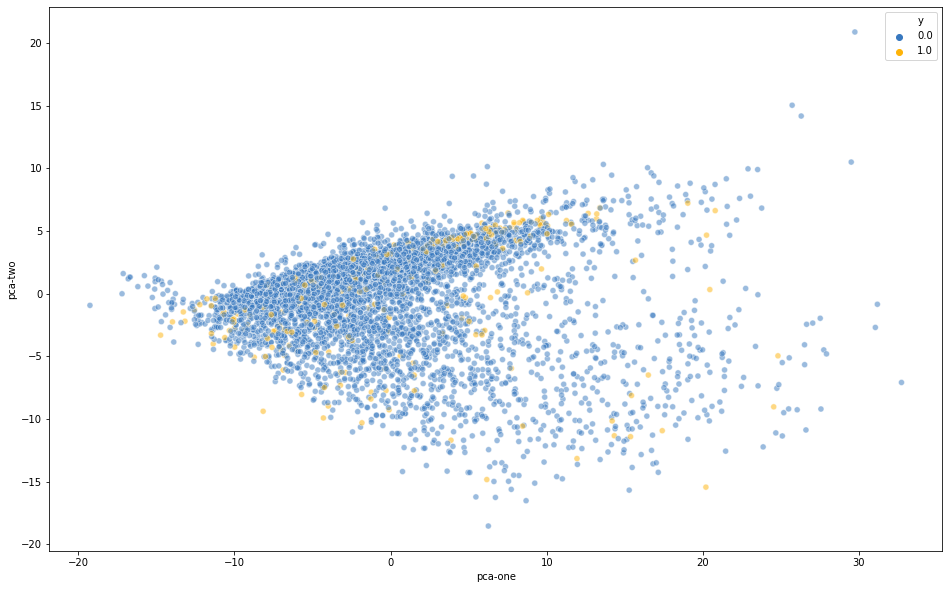

In [9]:
f=plt.figure(figsize=(16,10))
colors = ["windows blue", "amber"]
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    # palette=sns.color_palette("hls", 2),
    palette=sns.xkcd_palette(colors),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=1
)
f.savefig(os.path.join(fig_dir, "pca.png"))